<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/Monkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

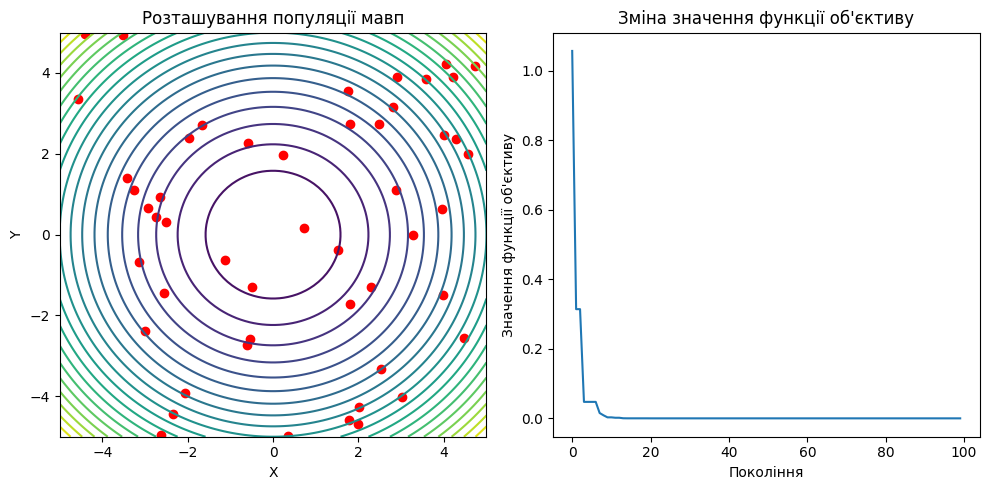

Best Solution: [1.0491599186240481e-10, 9.02127763969272e-10]
Objective Value: 8.248418678726707e-19


In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Функція для обчислення значення функції для оптимізації (мінімізації)
def objective_function(x):
    return sum(xi ** 2 for xi in x)

# Функція для ініціалізації популяції павукових мавп
def initialize_population(population_size, search_space):
    population = []
    for _ in range(population_size):
        individual = [random.uniform(search_space[i][0], search_space[i][1]) for i in range(len(search_space))]
        population.append(individual)
    return population

# Функція для візуалізації функції об'єктиву
def plot_objective_function(objective_function, search_space):
    x = np.linspace(search_space[0][0], search_space[0][1], 100)
    y = np.linspace(search_space[1][0], search_space[1][1], 100)
    X, Y = np.meshgrid(x, y)
    Z = objective_function([X, Y])
    plt.contour(X, Y, Z, levels=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Функція об\'єктиву')

# Основна функція алгоритму оптимізації павукової мавпи
def spider_monkey_optimization(population_size, search_space, max_generations):
    population = initialize_population(population_size, search_space)
    best_objective_values = []

    for generation in range(max_generations):
        local_leader = local_leader_phase(population)
        global_leader = global_leader_phase(population)

        for i in range(population_size):
            population[i] = move_monkey(population[i], local_leader, global_leader)

        # Зберігаємо найкраще значення функції об'єктиву в кожному поколінні
        best_objective_values.append(objective_function(global_leader))

    # Повертаємо найкращий знайдений результат та список найкращих значень функції об'єктиву
    return global_leader, best_objective_values

# Параметри алгоритму
population_size = 50
search_space = [(-5, 5)] * 2  # Для цього прикладу розглянемо простий простір пошуку в 2 вимірах
max_generations = 100

# Запуск алгоритму
best_solution, best_objective_values = spider_monkey_optimization(population_size, search_space, max_generations)

# Візуалізація результатів
plt.figure(figsize=(10, 5))

# Візуалізація контурної картки функції об'єктиву
plt.subplot(1, 2, 1)
plot_objective_function(objective_function, search_space)
population = initialize_population(population_size, search_space)
plt.scatter([monkey[0] for monkey in population], [monkey[1] for monkey in population], color='red')
plt.title('Розташування популяції мавп')

# Візуалізація зміни значення функції об'єктиву з поколіннями
plt.subplot(1, 2, 2)
plt.plot(best_objective_values)
plt.title('Зміна значення функції об\'єктиву')
plt.xlabel('Покоління')
plt.ylabel('Значення функції об\'єктиву')

plt.tight_layout()
plt.show()

print("Best Solution:", best_solution)
print("Objective Value:", objective_function(best_solution))
